# Changing of Camera Position and Vertical Exeggeration for plot_3d()

This notebook is based on the fixture model notebook created by Jan van Harten and will be extended with the implemented functionality at the bottom. The features include the possibility to adjust the camera position as well as the vertical exaggeration for the plot_3d function. 

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")
# just here as it is subfolder in experimental
os.pardir = '../..'

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
#import numpy as np
#import matplotlib.pyplot as plt

In [2]:
path_to_data = os.pardir+"/data/input_data/jan_models/"

geo_data = gp.create_data([0,2500,0,1000,0,1000],resolution=[50,20,20], 
                        path_o = path_to_data + "fixture_model_orientations.csv",
                        path_i = path_to_data + "fixture_model_surfaces.csv") 

Active grids: ['regular']


In [3]:
gp.map_series_to_surfaces(geo_data, {"Fault_Series": ('fault'), "Strat_Series1": ('rock3'),
                                     "Strat_Series2": ('rock2','rock1'),
                                     "Basement_Series":('basement')})

geo_data.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault_Series,True,False
Strat_Series1,False,False
Strat_Series2,False,False
Basement_Series,False,False


In [4]:
geo_data.surfaces.colors.change_colors({'fault': '#000000', 'rock1': '#CC081F', 'rock2': '#FFAA00',
                                        'rock3': '#006C8C', 'basement': '#097703'})

,surface,series,order_surfaces,isActive,color,id
3,fault,Fault_Series,1,True,#000000,1
0,rock3,Strat_Series1,1,True,#006C8C,2
1,rock2,Strat_Series2,1,True,#FFAA00,3
2,rock1,Strat_Series2,2,True,#CC081F,4
4,basement,Basement_Series,1,True,#097703,5


In [5]:
geo_data.surfaces

,surface,series,order_surfaces,isActive,color,id
3,fault,Fault_Series,1,True,#000000,1
0,rock3,Strat_Series1,1,True,#006C8C,2
1,rock2,Strat_Series2,1,True,#FFAA00,3
2,rock1,Strat_Series2,2,True,#CC081F,4
4,basement,Basement_Series,1,True,#097703,5


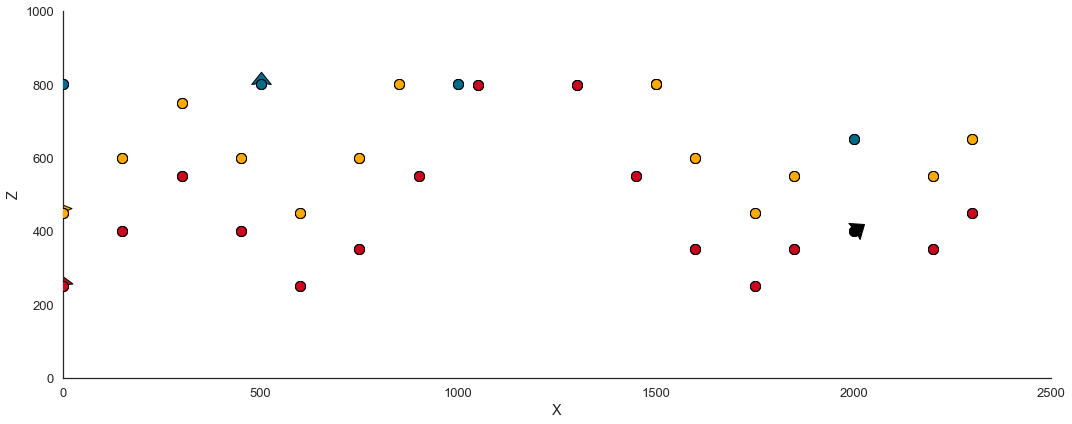

In [6]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

In [7]:
interp_data = gp.set_interpolation_data(geo_data, theano_optimizer='fast_compile')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                        values
range                 2872.28
$C_o$                  196429
drift equations  [3, 3, 3, 3]


In [8]:
sol = gp.compute_model(geo_data)

../../..\gempy\core\solution.py:284: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


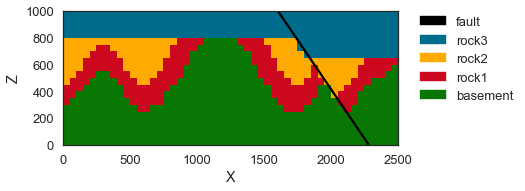

In [9]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=1,
                         direction='y', show_data=True)

# Default camera position and default ve (ve = 1)

The default camera position is set to cpos = [[-1.0 , -1.0 , 0.6], [0.0, 0.0, 0.0], [0, 0, 1]] to obtain a proper first view of the model without the need to adjust the camera position. The view is from the southwest towards the northeast.

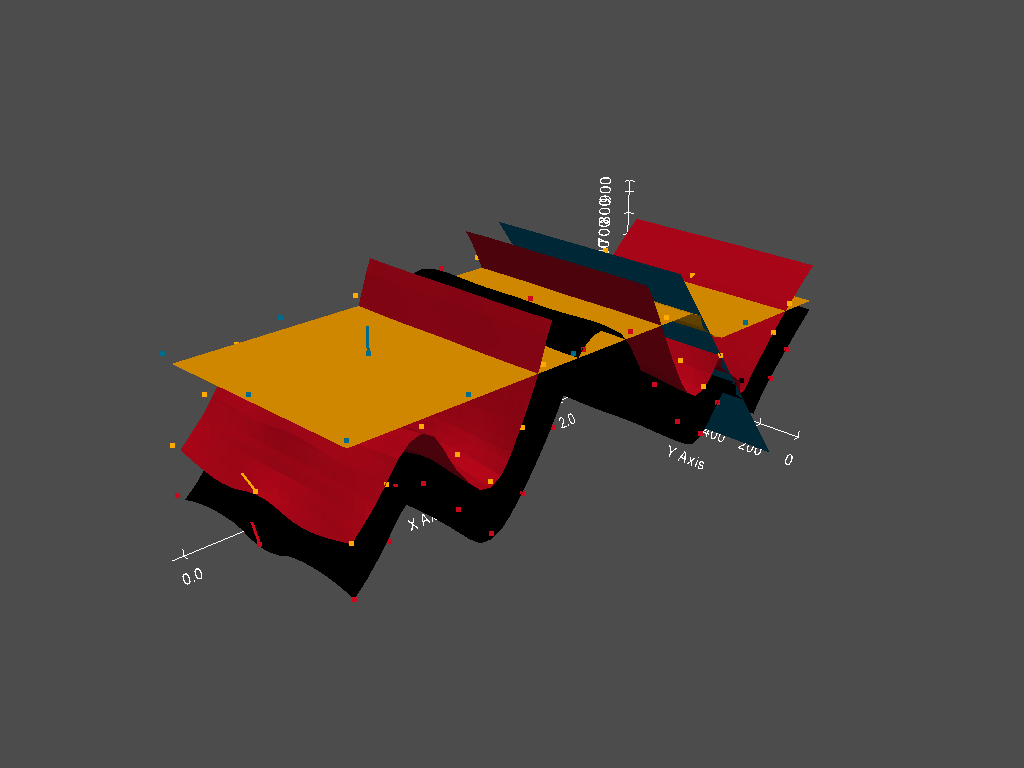

In [10]:
gp._plot.plot_3d(geo_data)

# Default camera position and ve = 5

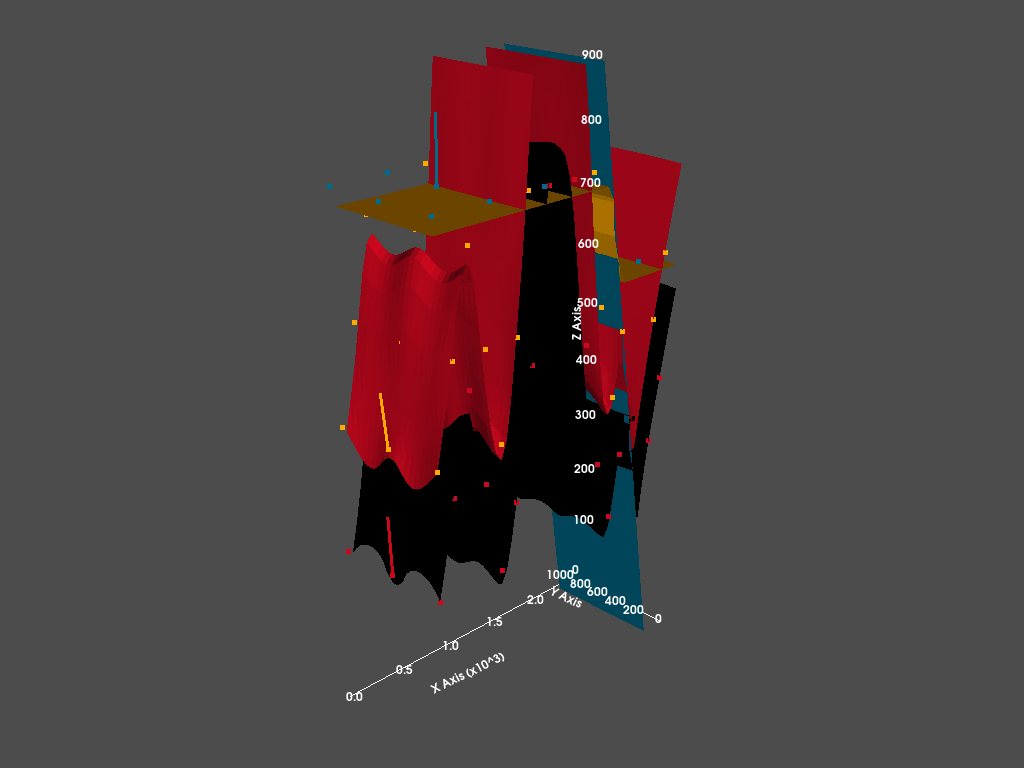

In [11]:
gp._plot.plot_3d(geo_data, ve = 5)

# Default camera position and ve = 0.5

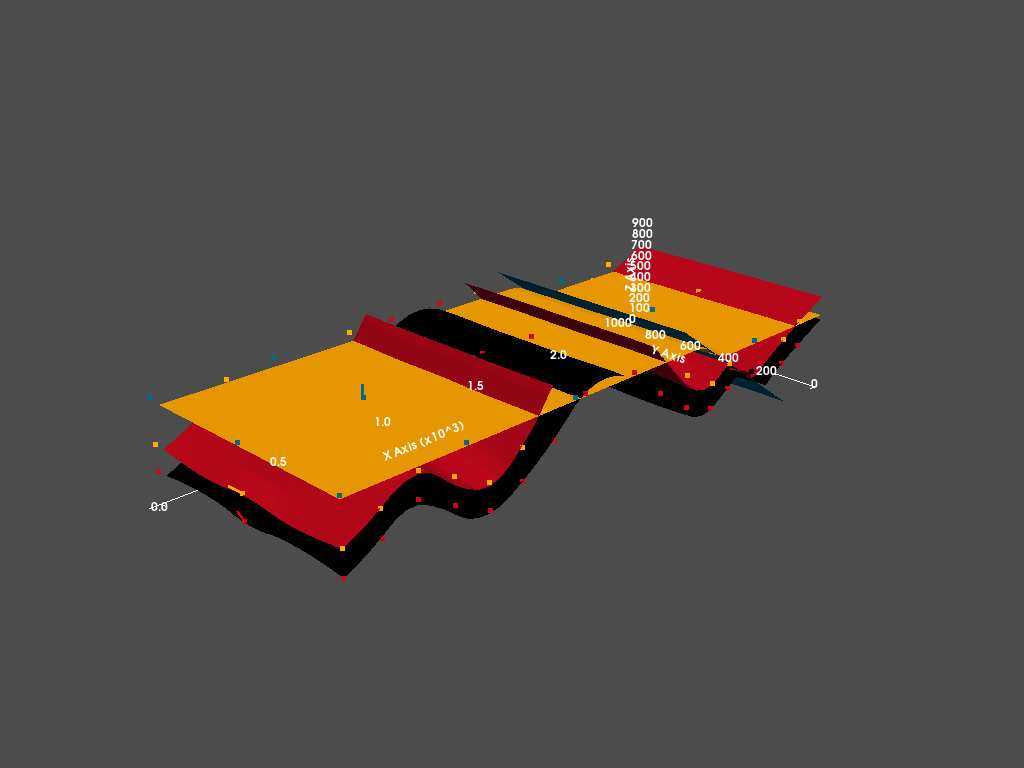

In [12]:
gp._plot.plot_3d(geo_data, ve = 0.5)

# Changed camera position and default ve

In order to change the camera position (cpos), a list consisting of the **position for the camera**, the **focal point** and the **view up** needs to be provided. By providing a focal point of [0.0, 0.0, 0.0] it is automatically set to the center of the model (average of all three coordinates). For the camera position, the first two floats define the rotation around the vertical axis and the third float the rotation around the horizontal axis. 

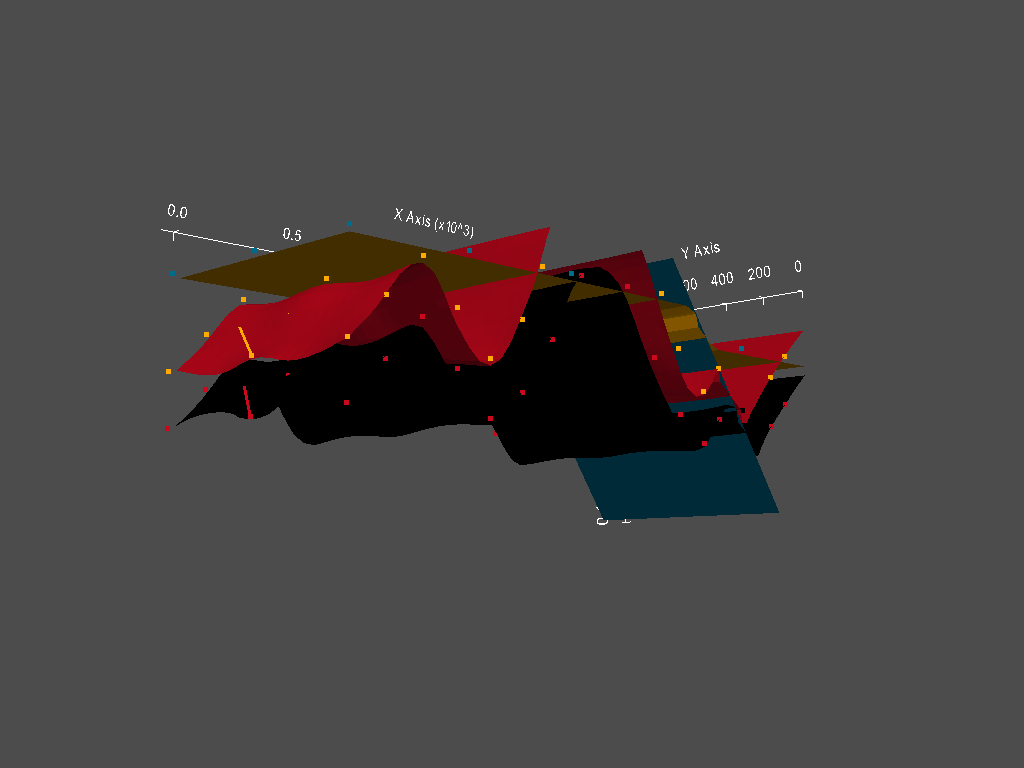

In [13]:
gp._plot.plot_3d(geo_data, cpos = [[-1.0 , -1.0 , -0.2], [0.0, 0.0, 0.0], [0, 0, 1]])

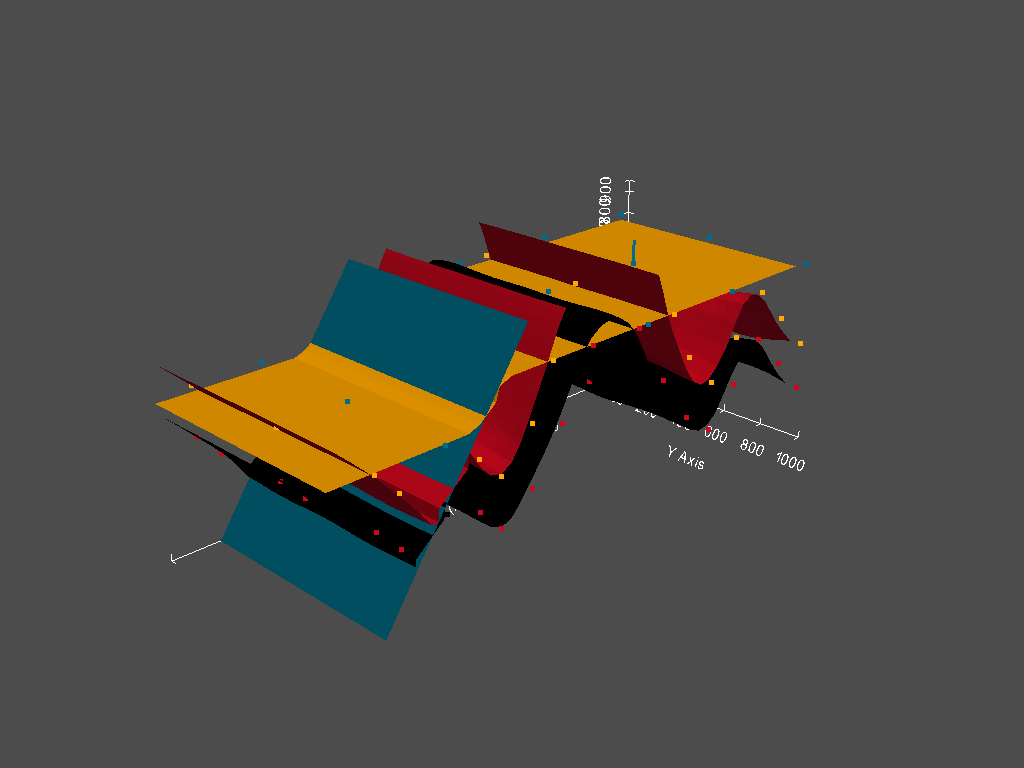

In [14]:
gp._plot.plot_3d(geo_data, cpos = [[1. , 1. , 0.6], [0.0, 0.0, 0.0], [0, 0, 1]])